# ニューラルネットワークの学習

## 用語の説明

- データ駆動：人の意識なく集められたデータのみを信用する考え方  
- 人駆動：人の意識によって集められた特徴量（ベクトル）、人の意識によって集められた分類法によって得られたデータを使用する考え方  
- 教師データ：ニューラルネットワークでいう、学習データ。学習データはディープラーニングにおいてデータ駆動として扱う都合テストデータと一致してはならない。

## 過学習(overfitting)

ディープラーニングのおいて特定個人・個別のデータの特徴量のみ意識してしまい汎化能力に欠けてしまうこと。
ディープラーニングに置いては 学習データ≠テストデータ≠将来的なデータ でなければならない。

## 損失関数(loss function)

出力における、テスト結果における正解との誤差のこと。平均二乗誤差(mean squared error)と交差エントロピー誤差（cross entropy error）の二つが代表的にある。この損失関数の値が小さいほど正解に近いということになる。

### 平均二乗誤差

$ E = \frac{1}{2}\Sigma_k((y_k - t_k)^2) $

In [1]:
import numpy as np
import pandas as pd
def mean_squared_error(y, t):
    return 0.5 * np.sum((y-t)**2)
a1,a2 = np.asarray([1,2,3]), np.asarray([1,2,4])
print(mean_squared_error(a1,a2))
a1,a2 = np.asarray([1,2,3]), np.asarray([1,2,10])
print( mean_squared_error(a1,a2) )
a1,a2 = np.asarray([1,2,3]), np.asarray([1,2,3])
print( mean_squared_error(a1,a2) )

0.5
24.5
0.0


### 交差エントロピー誤差

$ E = -\Sigma_k{(p_k \log q_k)} $  
$ 条件: 0 \leq p \leq 1, 0 \leq q \leq 1 $

#### log(x)の関数の特徴

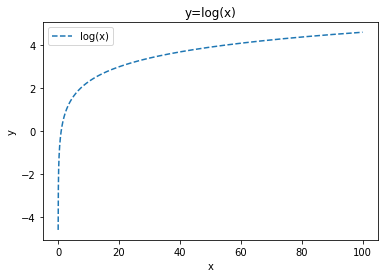

In [2]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する
import matplotlib.pyplot as plt
import numpy as np

import numpy as np
def log(x):
    return np.log(x)
x = np.arange(0.01,100,0.01)
y = log(x)

plt.plot(x,y,label="log(x)", linestyle="--")

plt.xlabel("x")
plt.ylabel("y")

plt.title("y=log(x)")

plt.legend()#show label box

plt.show()
plt.close()

#### 交差エントロピー誤差の関数

In [3]:
def softmax(array):
    return np.exp(array) / np.sum(np.exp(array))
def cross_entropy_error(y, t):
    delta = 1e-7 #Avoid log(0) => Inf
    return -np.sum(t * np.log(y + delta))

In [4]:
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]#One-Shot配列（正解＝１、不正解＝０に正規化したもの）
y = [0.1, 0.05, 0.6, 0.0, 0.05, 0.1, 0.0, 0.1, 0.0, 0.0]#SoftMax関数により正規化済
print("SUM t =",np.sum(np.array(t)))
print("SUM y =", np.sum(np.array(y)))
print("交差エントロピー誤差 = ",cross_entropy_error(np.array(y),np.array(t)))
t = [0, 0, 1, 0, 0, 0, 0, 0, 0, 0]#One-Shot配列（正解＝１、不正解＝０に正規化したもの）
y = [0.1, 0.05, 0.1, 0.0, 0.05, 0.1, 0.0, 0.6, 0.0, 0.0]#SoftMax関数により正規化済
print("SUM t =",np.sum(np.array(t)))
print("SUM y =", np.sum(np.array(y)))
print("交差エントロピー誤差 = ",cross_entropy_error(np.array(y),np.array(t)))

SUM t = 1
SUM y = 1.0
交差エントロピー誤差 =  0.510825457099338
SUM t = 1
SUM y = 1.0
交差エントロピー誤差 =  2.302584092994546


### ミニバッチ学習（サンプリング）

#### 損失関数を行列横断的に実施するためには、以下の関数を用いる

$$ E = -\frac{1}{N}\Sigma_n\Sigma_k(t_{nk}\log y_{nk})$$

#### 関数は難しいが単純に損失関数を各配列ごとにやって最後に足しているだけ。それぞれの配列の内容や要素数はもちろん異なるため、それぞれ正規化されていることが条件。最後に誤差を平均化するため配列数で割る。（これにより、それぞれのバッチのパーセプトロンの数（＝配列数）や次元数（＝配列の長さ）を変動させても互いに損失関数として比較可能とすることが出来る。）　→　膨大なデータの中から任意の数のデータのみをサンプリングして機械学習に流し込むことができるので、計算量を削減できる。しかも、サンプリングパーセンテージはその配列毎に変えることができる。（batch_size）

### MNISTデータを使ってミニバッチ学習を実践

In [5]:
# MNISTデータのロード
import sys,os
sys.path.append(os.pardir) #mnist.pyを呼び出すための設定
from dataset.mnist import load_mnist

#flattenで行列ではなく配列にする
#normalizeで0〜1に正規化する
(x_train, t_train),  (x_test, t_test) = load_mnist(normalize=False, one_hot_label=True)
#1画素 = 0〜256

print(x_train.shape) # 784画素 x 6万件の学習データ
print(t_train.shape) # 6万件の学習ラベルデータ
print(x_test.shape) # 784画素 x 1万件のテストデータ
print(t_test.shape) # 1万件のテストラベルデータ

(60000, 784)
(60000, 10)
(10000, 784)
(10000, 10)


In [6]:
#MNISTデータからランダムサンプリング
batch_size = 10
np.random.choice(x_train.shape[0], batch_size)#0～60000の配列のうち、どの配列を使うか選んで数字でインデックスを返す

array([11357, 23726, 38963, 48357, 18302, 45106, 47393, 21141, 52581,
       30185])

#### ミニバッチ対応版（交差エントロピー誤差　損失関数の実装）

In [7]:
def cross_entropy_error(y, t):
    if y.ndim == 1:
        t = t.reshape(1,t.size)
        y = y.reshape(1, y.size)

    batch_size = y.shape[0]
    # One-Hot表現の場合、0 or 1なので、
    return -np.sum(np.log(y[np.arange(batch_size), t])) / batch_size

## 認識精度よりも損失度を認識度の指標とする理由

- 認識精度はどのレベルまで認識できれば良いのか上限が見えず、たまたま100%になる（微分し傾きが0になる場所が多く存在する）ことがありデータ表現として0～1の間で表せられないことが多い。（機械が扱うには少し弱いデータ）
- 誤差精度は滅多に100%になることがなく、ゆるやかに収束する（微分し傾きが0になる場所が滅多に存在しない）ため微細なパラメータ調整の結果得られる誤差移動率（＝微分した際の傾き）が算出可能となり0～1の間で表せられる。（機械が扱いやすい）

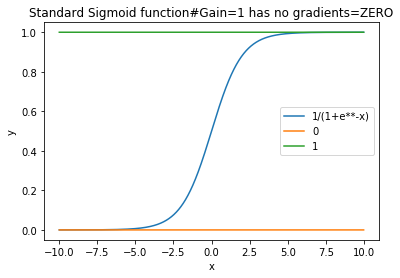

In [8]:
%matplotlib inline
#plt.show()をinlineにて表示する
#Esc+Lで行番号を表示する1
import matplotlib.pyplot as plt
import numpy as np

x1 = np.arange(-10,10,0.01) #-0 to 10 by 0.01
y1 = 1.0/(1.0 + np.e ** (-1.0*x1))

x2 = x1
y2 = x2*0

x3 = x1
y3 = x3*0+1

plt.plot(x1,y1,label="1/(1+e**-x)", linestyle="-")
plt.plot(x2,y2,label="0", linestyle="-")
plt.plot(x3,y3,label="1", linestyle="-")

plt.xlabel("x")
plt.ylabel("y")

plt.title("Standard Sigmoid function#Gain=1 has no gradients=ZERO")

plt.legend()#show label box

plt.show()
plt.close()

## 誤差の遷移に傾き（微分）を使う際の丸め誤差

In [9]:
np.float32(1e-50)

0.0

### 微分方程式

$$ f'(x)=\frac{d}{dx}f(x)=\lim_{\Delta x \to 0} \frac{f(x+\Delta x)-f(x)}{\Delta x} $$

### 数値微分プログラム

In [10]:
def numerical_diff(f, x):
    h = 10e-4
    return (f(x+h) - f(x)) / 2*h

### 解析的な微分と数値微分

- 数値的微分： 最小の微動値(h)を+-し、結果の計算結果の差分を2で割る
- 解析的微分： 微分方程式を使用し変数を残した状態で算出する

0.1999999999990898


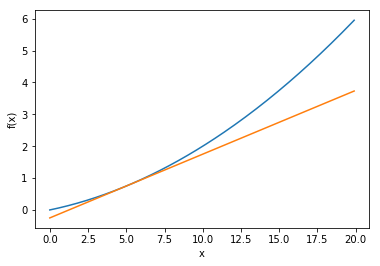

In [11]:
# coding: utf-8
import numpy as np
import matplotlib.pylab as plt


def numerical_diff(f, x):
    h = 1e-4 # 0.0001
    return (f(x+h) - f(x-h)) / (2*h)


def function_1(x):
    return 0.01*x**2 + 0.1*x 


def tangent_line(f, x):
    d = numerical_diff(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
x = np.arange(0.0, 20.0, 0.1)
y = function_1(x)
plt.xlabel("x")
plt.ylabel("f(x)")

tf = tangent_line(function_1, 5)
y2 = tf(x)

plt.plot(x, y)
plt.plot(x, y2)
plt.show()
#傾きが0.2になっていない！

- 傾きが0.2になっていないが、接線にはなっているように見えることに着目する

### 偏微分

略（微分が対象軸（＝変数）ごとに実施できることと、複数の微分演算子が微分の順番を変えても最終的には成り立つということが示されていること）

### 勾配

行列式において、全ての値についての偏微分を求めてベクトル行列化したものを勾配と呼ぶ。

In [12]:
def numerical_gradient(f, x):
    """f関数におけるx配列の数値微分をし、それぞれの値の勾配（微分した際の傾きを返します）をxと同じ列数の配列で返します。"""
    h = 1e-4 # 0.0001（微動）
    grad = np.zeros_like(x) # 0 * xと同義

    for idx in range(x.size):
        
        #一旦退避。
        tmp_val = x[idx]
        
        #もしプラスの方向に微動した場合の結果は？
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        #もしマイナスの方向に微動した場合の結果は？
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        
        #配列を数値微分
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        #傾きの計算が終わったので、一旦値を戻す
        x[idx] = tmp_val
        
    return grad

#### 勾配降下のイメージ図（2次元関数の場合）→傾きが0に収束するためのベクトルがプロットされる

No handles with labels found to put in legend.


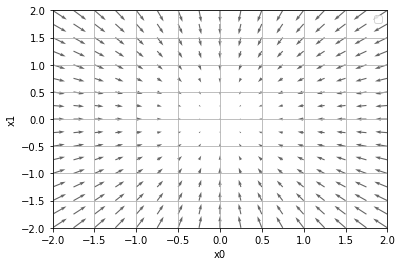

In [13]:
# coding: utf-8
# cf.http://d.hatena.ne.jp/white_wheels/20100327/p3
import numpy as np
import matplotlib.pylab as plt
from mpl_toolkits.mplot3d import Axes3D


def _numerical_gradient_no_batch(f, x):
    h = 1e-4 # 0.0001
    grad = np.zeros_like(x)
    
    for idx in range(x.size):
        tmp_val = x[idx]
        x[idx] = float(tmp_val) + h
        fxh1 = f(x) # f(x+h)
        
        x[idx] = tmp_val - h 
        fxh2 = f(x) # f(x-h)
        grad[idx] = (fxh1 - fxh2) / (2*h)
        
        x[idx] = tmp_val # 値を元に戻す
        
    return grad


def numerical_gradient(f, X):
    if X.ndim == 1:
        return _numerical_gradient_no_batch(f, X)
    else:
        grad = np.zeros_like(X)
        
        for idx, x in enumerate(X):
            grad[idx] = _numerical_gradient_no_batch(f, x)
        
        return grad


def function_2(x):
    if x.ndim == 1:
        return np.sum(x**2)
    else:
        return np.sum(x**2, axis=1)


def tangent_line(f, x):
    d = numerical_gradient(f, x)
    print(d)
    y = f(x) - d*x
    return lambda t: d*t + y
     
if __name__ == '__main__':
    x0 = np.arange(-2, 2.5, 0.25)
    x1 = np.arange(-2, 2.5, 0.25)
    X, Y = np.meshgrid(x0, x1)
    
    X = X.flatten()
    Y = Y.flatten()
    
    grad = numerical_gradient(function_2, np.array([X, Y]) )
    
    plt.figure()
    plt.quiver(X, Y, -grad[0], -grad[1],  angles="xy",color="#666666")#,headwidth=10,scale=40,color="#444444")
    plt.xlim([-2, 2])
    plt.ylim([-2, 2])
    plt.xlabel('x0')
    plt.ylabel('x1')
    plt.grid()
    plt.legend()
    plt.draw()
    plt.show()

関数が収束する方向にベクトルが向いていることに注意。

### 勾配法

関数の傾きが0となる点を目指して関数の値を徐々に収束させる手法。
今回の場合は損失関数を0に収束させるため、勾配降下法と呼ぶ。

#### 勾配法

$$ x_1 = x_0 - \eta \frac{\partial f}{\partial x_0} ,\ \  x_2 = x_1 - \eta \frac{\partial f}{\partial x_1} ,...$$
$$ \eta = 学習率 (概ね、0.01や0.001などの値になる。ハイパーパラメータ) $$

#### 勾配法プログラム

In [14]:
import numpy as np
import matplotlib.pylab as plt
from gradient_2d import numerical_gradient

def gradient_descent(f, init_x, lr=0.01, step_num=100):
    """f : 最適化が必要な関数, init_xは初期値, lrは学習率, step_numは勾配降下回数. fの傾きが最小となるような"""
    x = init_x
    x_history = []

    for i in range(step_num):
        x_history.append( x.copy() )

        grad = numerical_gradient(f, x)
        x -= lr * grad

    return x,np.array(x_history)

$$ f(x_0, x_1) = x_0^2 + x_1^2 $$ の最小値を勾配法プログラムによって求める。

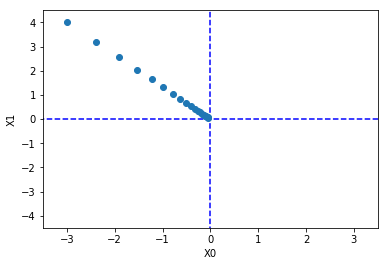

In [15]:
def function_2(x):
    return x[0]**2 + x[1]**2

init_x = np.array([-3.0, 4.0])    

lr = 0.1
step_num = 20
x, x_history = gradient_descent(function_2, init_x, lr=lr, step_num=step_num)

plt.plot( [-5, 5], [0,0], '--b')
plt.plot( [0,0], [-5, 5], '--b')
plt.plot(x_history[:,0], x_history[:,1], 'o')

plt.xlim(-3.5, 3.5)
plt.ylim(-4.5, 4.5)
plt.xlabel("X0")
plt.ylabel("X1")
plt.show()

偏微分の公式おさらい  
$
\displaystyle{ \left( k f_{x}\right) = k f_{x} } \\
\displaystyle{ \left(  f \pm g \right)_{x} = f_{x} \pm g_{x} } \\
\displaystyle{ \left(  f \cdot g \right)_{x} = f_{x} \cdot g + f \cdot g_{x} } \\
\displaystyle{ \left(  \frac{f}{g} \right)_{x} = \frac{ f_{x} \cdot g – f \cdot g_{x} }{g^2} } \\
\begin{aligned}
      \frac{\partial f}{\partial x} &= \frac{d f}{du} \frac{\partial u}{\partial x} \\
      \frac{\partial f}{\partial y} &= \frac{d f}{du} \frac{\partial u}{\partial y}
\end{aligned}
$

### ニューラルネットワーク（行列式）における勾配降下プログラム

In [16]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
from common.functions import softmax, cross_entropy_error
from common.gradient import numerical_gradient


class simpleNet:
    def __init__(self):
        self.W = np.random.randn(2,3)#2行x3列の行列として作成
        #ガウス分布で初期化

    def predict(self, x):
        """内積をとる（自身のW（重み）を積算）"""
        return np.dot(x, self.W)

    def loss(self, x, t):
        """x = 入力データ、 t = テストデータ"""
        z = self.predict(x)
        y = softmax(z)#0〜1の値へと汎化
        loss = cross_entropy_error(y, t) #tはone-shot行列とする（正解=1、不正解=0）

        return loss

x = np.array([0.6, 0.9])# 1行2列
t = np.array([0, 0, 1]) #1行3列

net = simpleNet()
f = lambda w: net.loss(x, t)
dW = numerical_gradient(f, net.W)

print("W=",net.W)
print("dW=",dW)
print("WをdWを下げるようにベクトルを向ける必要がある")

W= [[-0.29987897 -2.12317372  0.47065595]
 [-0.39304798 -0.98756266 -0.75852701]]
dW= [[ 0.25654033  0.05031211 -0.30685244]
 [ 0.38481049  0.07546816 -0.46027865]]
WをdWを下げるようにベクトルを向ける必要がある


### 学習アルゴリズムの実装

1. ミニバッチ（訓練データサンプリング）
    - 訓練データの中からランダムに一部のデータを選びだす。その選ばれたデータをミニバッチと言い、ここでは、そのミニバッチの損失関数の値を減らすことを目的とする。（ミニバッチは無作為サンプリングの手法のため、__確率的勾配降下法(stochastic gradient descent, SGD)__と呼ばれる）
2. 勾配算出
    - ミニバッチの損失関数を減らすために、各重みのパラメータの勾配を求める。勾配は損失関数の値をもっとも減らす方向を示す。
3. パラメータの更新
    - 重みパラメータを勾配方向に微小量だけ更新する。
4. 繰り返し
    - 1 ~ 3 の繰り返し

In [17]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
from common.functions import *
from common.gradient import numerical_gradient


class TwoLayerNet:
    """
    2層ニューラルネットワークの実装
    """
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        """input_size = 入力の数(MNISTの場合、28 x 28の画素=784), hidden_size = 隠れ層の数(ハイパーパラメータ), output_size = 出力の数(MNISTの場合、0〜9の数字=10), weight_init_std = 重みの標準化引数(?)"""
        # 重みの初期化
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size) #ガウス分布による重みパラメータの初期化
        self.params['b1'] = np.zeros(hidden_size) #一様分布によるバイアスパラメータの初期化
        self.params['W2'] = weight_init_std * np.random.randn(hidden_size, output_size) #ガウス分布による重みパラメータの初期化
        self.params['b2'] = np.zeros(output_size) #一様分布によるバイアスパラメータの初期化

    def predict(self, x):
        """入力に対する出力を確率配列として返す"""
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
    
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        return y
        
    # x:入力データ, t:教師データ
    def loss(self, x, t):
        """誤差を交差エントロピー誤差関数によって返す（y =確率配列 , t =one-hot配列）"""
        y = self.predict(x)
        return cross_entropy_error(y, t)
    
    def accuracy(self, x, t):
        """正確度を返す。x = 入力データ、t = テストデータ、accuracy = **%"""
        y = self.predict(x)
        y = np.argmax(y, axis=1)
        t = np.argmax(t, axis=1)
        
        accuracy = np.sum(y == t) / float(x.shape[0])
        return accuracy
        
    # x:入力データ, t:教師データ
    def numerical_gradient(self, x, t):
        loss_W = lambda W: self.loss(x, t)
        
        grads = {}
        grads['W1'] = numerical_gradient(loss_W, self.params['W1'])
        grads['b1'] = numerical_gradient(loss_W, self.params['b1'])
        grads['W2'] = numerical_gradient(loss_W, self.params['W2'])
        grads['b2'] = numerical_gradient(loss_W, self.params['b2'])
        
        return grads
        
    def gradient(self, x, t):
        W1, W2 = self.params['W1'], self.params['W2']
        b1, b2 = self.params['b1'], self.params['b2']
        grads = {}
        
        batch_num = x.shape[0]
        
        # forward
        a1 = np.dot(x, W1) + b1
        z1 = sigmoid(a1)
        a2 = np.dot(z1, W2) + b2
        y = softmax(a2)
        
        # backward
        dy = (y - t) / batch_num
        grads['W2'] = np.dot(z1.T, dy)
        grads['b2'] = np.sum(dy, axis=0)
        
        da1 = np.dot(dy, W2.T)
        dz1 = sigmoid_grad(a1) * da1
        grads['W1'] = np.dot(x.T, dz1)
        grads['b1'] = np.sum(dz1, axis=0)

        return grads

### 2層ニューラルネットワークを使った学習

train acc, test acc | 0.09736666666666667, 0.0982
train acc, test acc | 0.7876666666666666, 0.7933
train acc, test acc | 0.8752166666666666, 0.8781
train acc, test acc | 0.89835, 0.9014
train acc, test acc | 0.9069333333333334, 0.9097
train acc, test acc | 0.91465, 0.916
train acc, test acc | 0.91805, 0.919
train acc, test acc | 0.92405, 0.926
train acc, test acc | 0.9279833333333334, 0.9289
train acc, test acc | 0.9319166666666666, 0.9331
train acc, test acc | 0.93435, 0.9334
train acc, test acc | 0.9368833333333333, 0.9367
train acc, test acc | 0.9393833333333333, 0.9385
train acc, test acc | 0.9413, 0.9398
train acc, test acc | 0.9433666666666667, 0.9411
train acc, test acc | 0.9456833333333333, 0.9425
train acc, test acc | 0.9476, 0.9463


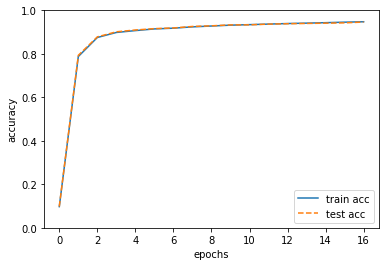

In [18]:
# coding: utf-8
import sys, os
sys.path.append(os.pardir)  # 親ディレクトリのファイルをインポートするための設定
import numpy as np
import matplotlib.pyplot as plt
from dataset.mnist import load_mnist
from two_layer_net import TwoLayerNet

# データの読み込み
(x_train, t_train), (x_test, t_test) = load_mnist(normalize=True, one_hot_label=True)

network = TwoLayerNet(input_size=784, hidden_size=50, output_size=10)

iters_num = 10000  # 繰り返しの回数を適宜設定する
train_size = x_train.shape[0]
batch_size = 100
learning_rate = 0.1

train_loss_list = []
train_acc_list = []
test_acc_list = []

iter_per_epoch = max(train_size / batch_size, 1)

for i in range(iters_num):
    batch_mask = np.random.choice(train_size, batch_size)
    x_batch = x_train[batch_mask]
    t_batch = t_train[batch_mask]
    
    # 勾配の計算
    #grad = network.numerical_gradient(x_batch, t_batch)
    grad = network.gradient(x_batch, t_batch)
    
    # パラメータの更新
    for key in ('W1', 'b1', 'W2', 'b2'):
        network.params[key] -= learning_rate * grad[key]
    
    loss = network.loss(x_batch, t_batch)
    train_loss_list.append(loss)
    
    if i % iter_per_epoch == 0:
        train_acc = network.accuracy(x_train, t_train)
        test_acc = network.accuracy(x_test, t_test)
        train_acc_list.append(train_acc)
        test_acc_list.append(test_acc)
        print("train acc, test acc | " + str(train_acc) + ", " + str(test_acc))

# グラフの描画
markers = {'train': 'o', 'test': 's'}
x = np.arange(len(train_acc_list))
plt.plot(x, train_acc_list, label='train acc')
plt.plot(x, test_acc_list, label='test acc', linestyle='--')
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.show()

__学習データにおける正確さとテストデータにおける正確さが概ね合致しているので、「過学習」は起きていないと思われる！__  